In [1]:
#!pip install geopandas

In [2]:
#setting libraries
import pandas as pd
from plotnine import * 
import geopandas as gpd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [3]:
#reading in file
df = pd.read_csv("../data/cleaned_data/final_data.csv")
gdf_points = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['long'], df['lat']), crs="EPSG:4326")

In [4]:
#dataset of only the opened in 2013
df_13 = df[df["open_year"] == 2013.0]

In [5]:
#reading in geographic data 
america = gpd.read_file('../data/raw_data/county_shape_file')

In [6]:
#list of counties in DMV
dmv_counties = [
    ('11','001'),  # Washington, D.C.
    ('24', '031'),  # Montgomery County, MD
    ('24', '033'),  # Prince George's County, MD
    ('51', '013'),  # Arlington County, VA
    ('51', '059'),  # Fairfax County, VA
    ('51', '600'),   # Falls Church, VA
    ('51', '510')   # Alexandria, VA
]

In [7]:
#filtering for DMV counties
dmv = america[
    america.apply(lambda x: (x['STATEFP'], x['COUNTYFP']) in dmv_counties, axis=1)
]

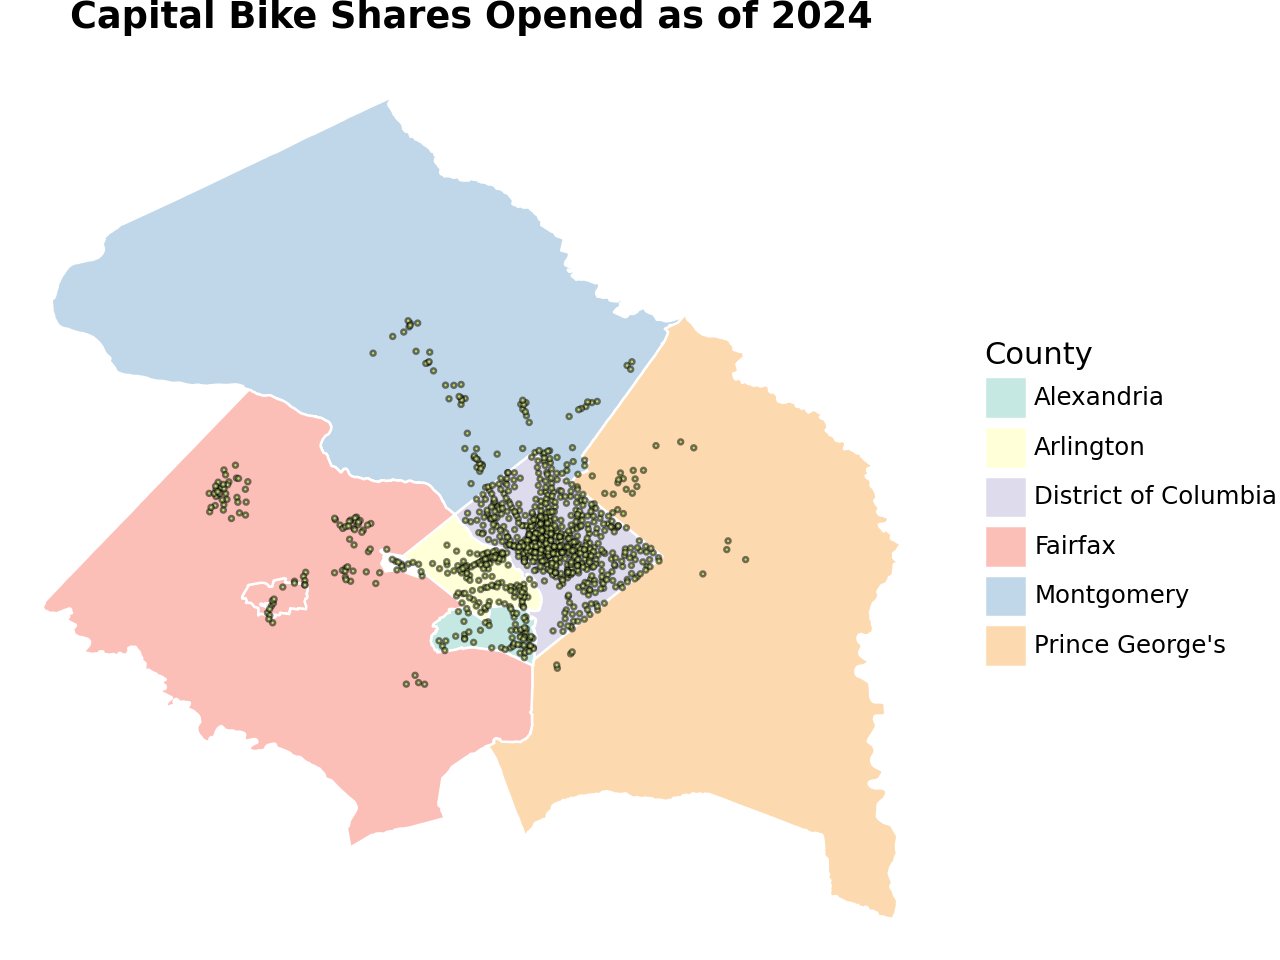

In [9]:
#plot of bikeshares opened as of today
(
ggplot(data = df) +
    geom_map(data = dmv,
            mapping = aes(fill = 'NAME', geometry = 'geometry'),
            color = "white",
            alpha = 0.5) +
    geom_point(mapping = aes(x = 'long', y = 'lat'),
               color = "black",
               fill = "#c3d67aff",
               size = 0.5,
               alpha = 0.5
        ) +
    labs(title = "Capital Bike Shares Opened as of 2024", fill = "County") +
    theme_void() +
    theme(
      plot_title=element_text(face="bold")
    ) +
    scale_fill_brewer(type="qual", palette="Set3")
)

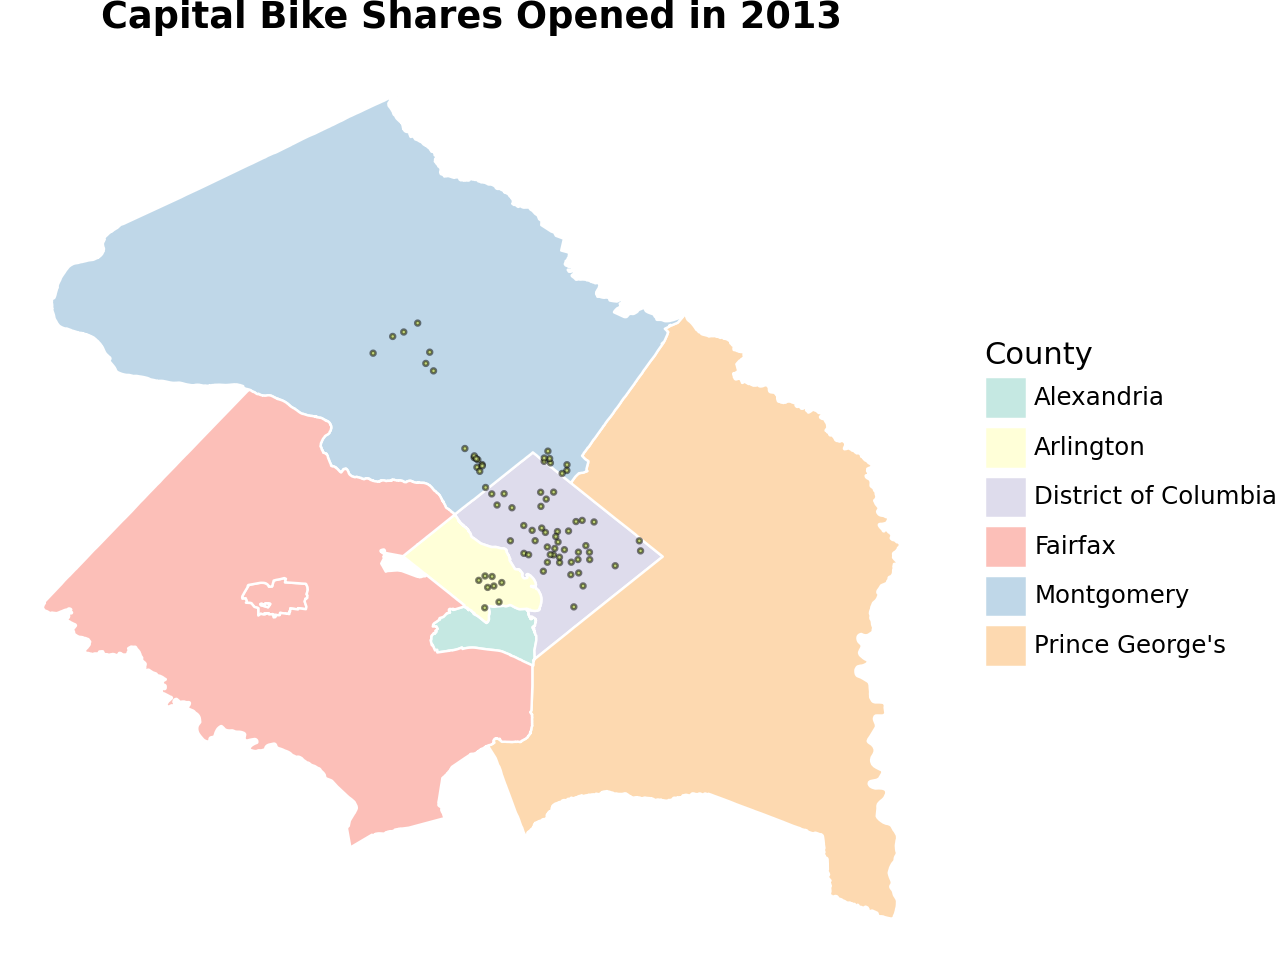

In [11]:
#plot of bikeshares opened in 2013
(
ggplot(data = df_13) +
    geom_map(data = dmv,
            mapping = aes(fill = 'NAME', geometry = 'geometry'),
            color = "white",
            alpha = 0.5) +
    geom_point(mapping = aes(x = 'long', y = 'lat'),
               color = "black",
               fill = "#c3d67aff",
               size = 0.5,
               alpha = 0.5
        ) +
    labs(title = "Capital Bike Shares Opened in 2013", fill = "County") +
    theme_void() +
    theme(
      plot_title=element_text(face="bold")
    ) +
    scale_fill_brewer(type="qual", palette="Set3")
)

In [12]:
#turned from wide to long
df_13_traffic = df_13.melt(id_vars=['id', 'long', 'lat', 'open_year', 'name', 'opened_station', 'opened_2013'], var_name = "year", value_name = "aadt")

In [13]:
#treat year as category
df_13_traffic['year'] = df_13_traffic['year'].astype('category')

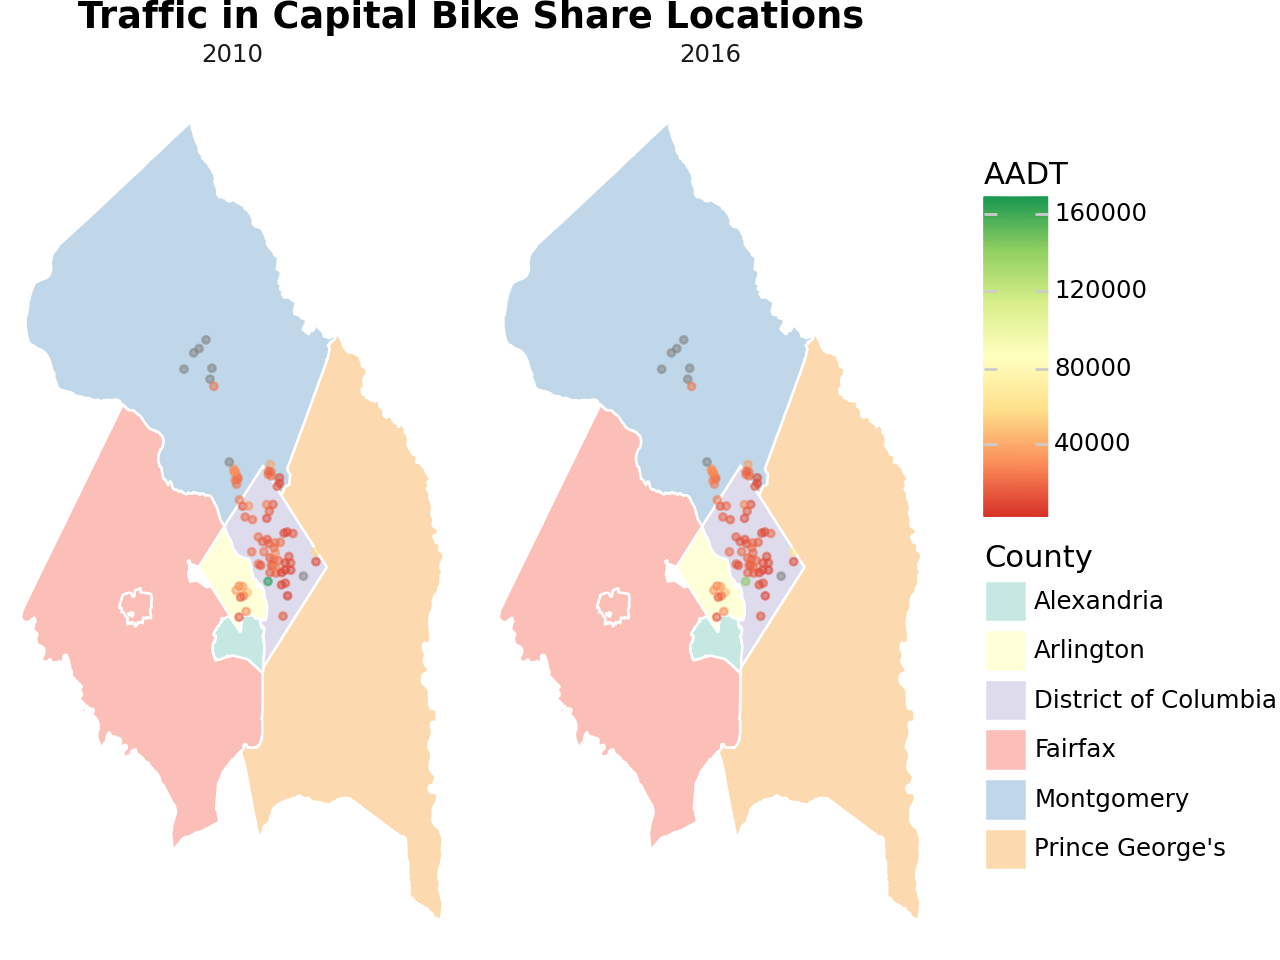

In [18]:
#plot of bikeshares opened in 2013 colored by traffic volume 
(
ggplot(data = df_13_traffic[df_13_traffic['year'].isin(["2010", "2016"])]) +
    geom_map(data = dmv,
            mapping = aes(fill = 'NAME', geometry = 'geometry'),
            color = "white",
            alpha = 0.5) +
    geom_point(mapping = aes(x = 'long', y = 'lat', color = "aadt"),
               size = 1,
               alpha = 0.5
        ) +
    labs(title = "Traffic in Capital Bike Share Locations", fill = "County", color = "AADT") +
    theme_void() +
    theme(
      plot_title=element_text(face="bold")
    ) +
    facet_grid('~year') +
    scale_color_distiller(type = "div",palette="RdYlGn", direction = 1) +
    scale_fill_brewer(type="qual", palette="Set3")
)

In [20]:
#computing change in aadt
df_13["change"] = (df_13["2010"]-df_13["2016"])/df_13["2010"] * 100

C:\Users\helen\AppData\Local\Temp\ipykernel_28376\2543595219.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


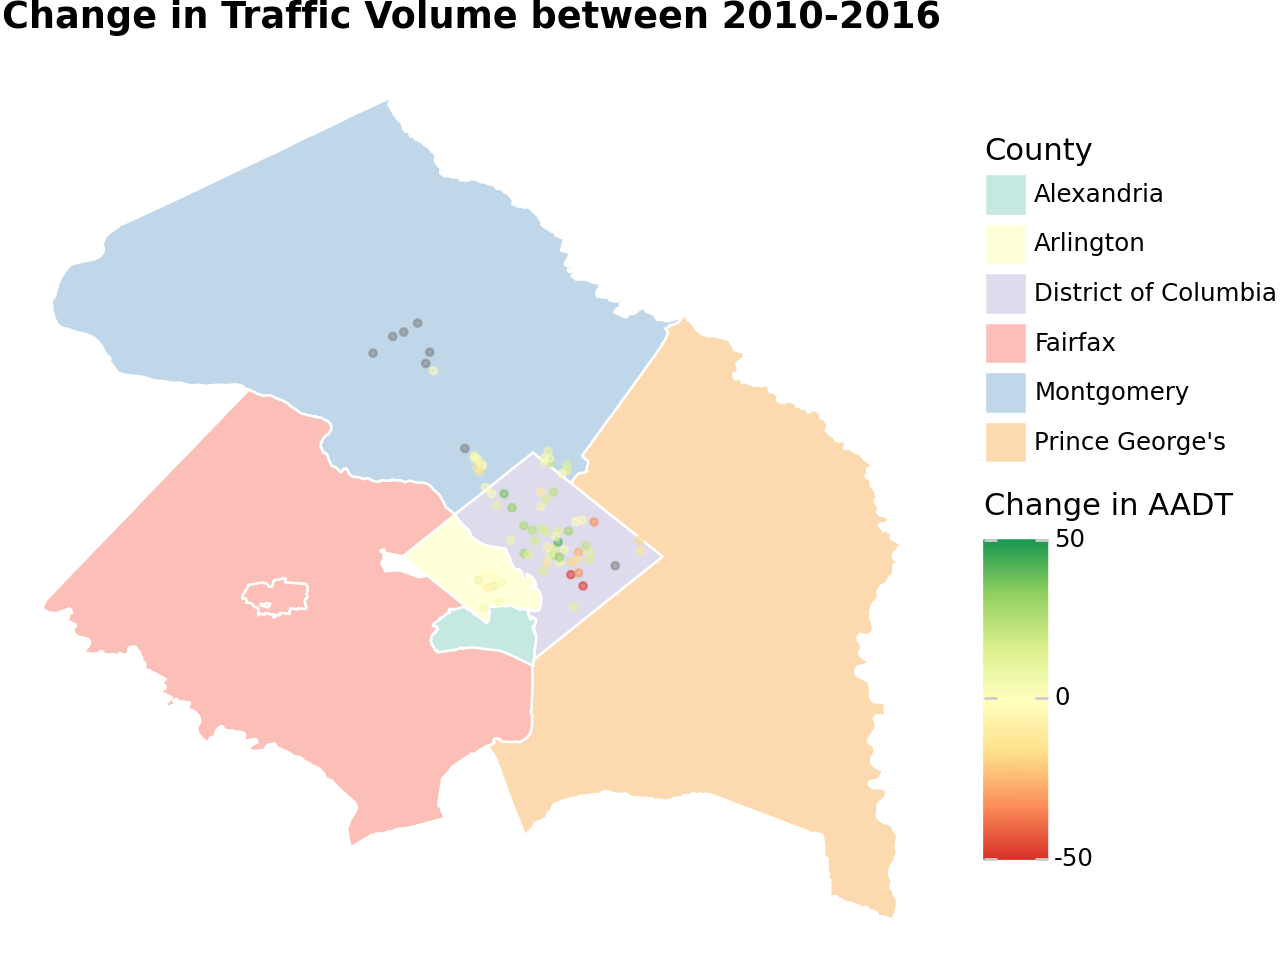

In [21]:
#plot of proposed, unopened bikeshares 
(
ggplot(data = df_13) +
    geom_map(data = dmv,
            mapping = aes(fill = 'NAME', geometry = 'geometry'),
            color = "white",
            alpha = 0.5) +
    geom_point(mapping = aes(x = 'long', y = 'lat', color = "change"),
               size = 1,
               alpha = 0.5
        ) +
    labs(title = "Change in Traffic Volume between 2010-2016", fill = "County",
        color = "Change in AADT") +
    theme_void() +
    theme(
      plot_title=element_text(face="bold")
    )+
    scale_fill_brewer(type="qual", palette="Set3") +
    scale_color_distiller(type = "div",palette="RdYlGn", direction = 1,
                        limits=(-50, 50),
                         breaks=[-50, 0, 50])
)

In [22]:
#computing change in aadt for all stations opened in 2024
df["change"] = (df["2010"]-df["2016"])/df["2010"] * 100

In [16]:
df.columns

Index(['id', 'long', 'lat', 'open_year', 'name', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', 'opened_station', 'opened_2013',
       'change'],
      dtype='object')

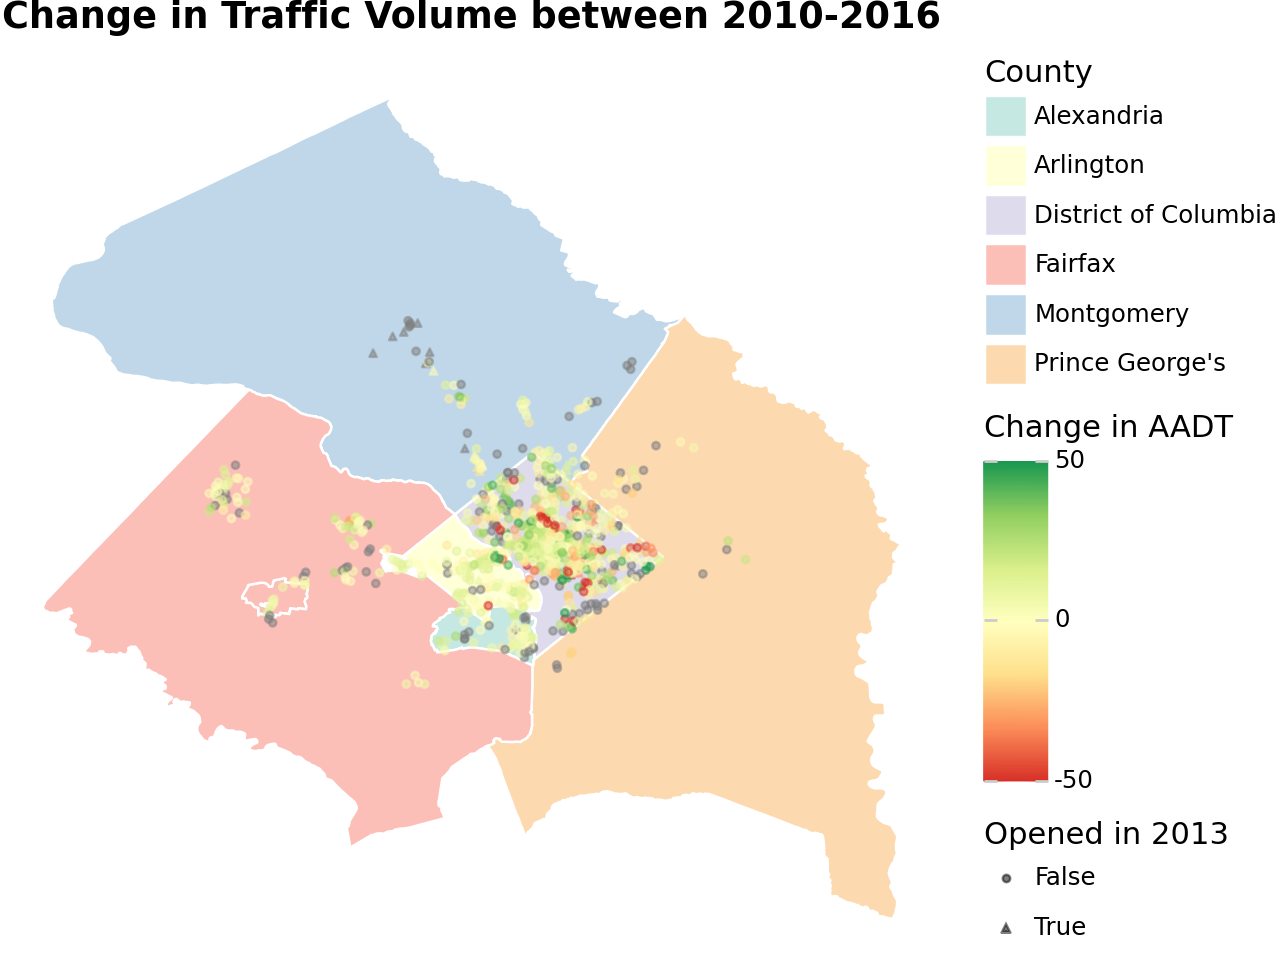

In [23]:
#plot of proposed, unopened bikeshares 
(
ggplot(data = df) +
    geom_map(data = dmv,
            mapping = aes(fill = 'NAME', geometry = 'geometry'),
            color = "white",
            alpha = 0.5) +
    geom_point(mapping = aes(x = 'long', y = 'lat', color = "change", shape = "opened_2013"),
               size = 1,
               alpha = 0.5
        ) +
    labs(title = "Change in Traffic Volume between 2010-2016", fill = "County",
        color = "Change in AADT", shape = "Opened in 2013") +
    theme_void() +
    theme(
      plot_title=element_text(face="bold")
    )+
    scale_fill_brewer(type="qual", palette="Set3") +
    scale_color_distiller(type = "div",palette="RdYlGn", direction = 1,
                        limits=(-50, 50),
                         breaks=[-50, 0, 50])
)

In [25]:
#getting stations that are unopened
proposed = df[df["opened_station"] == 0]

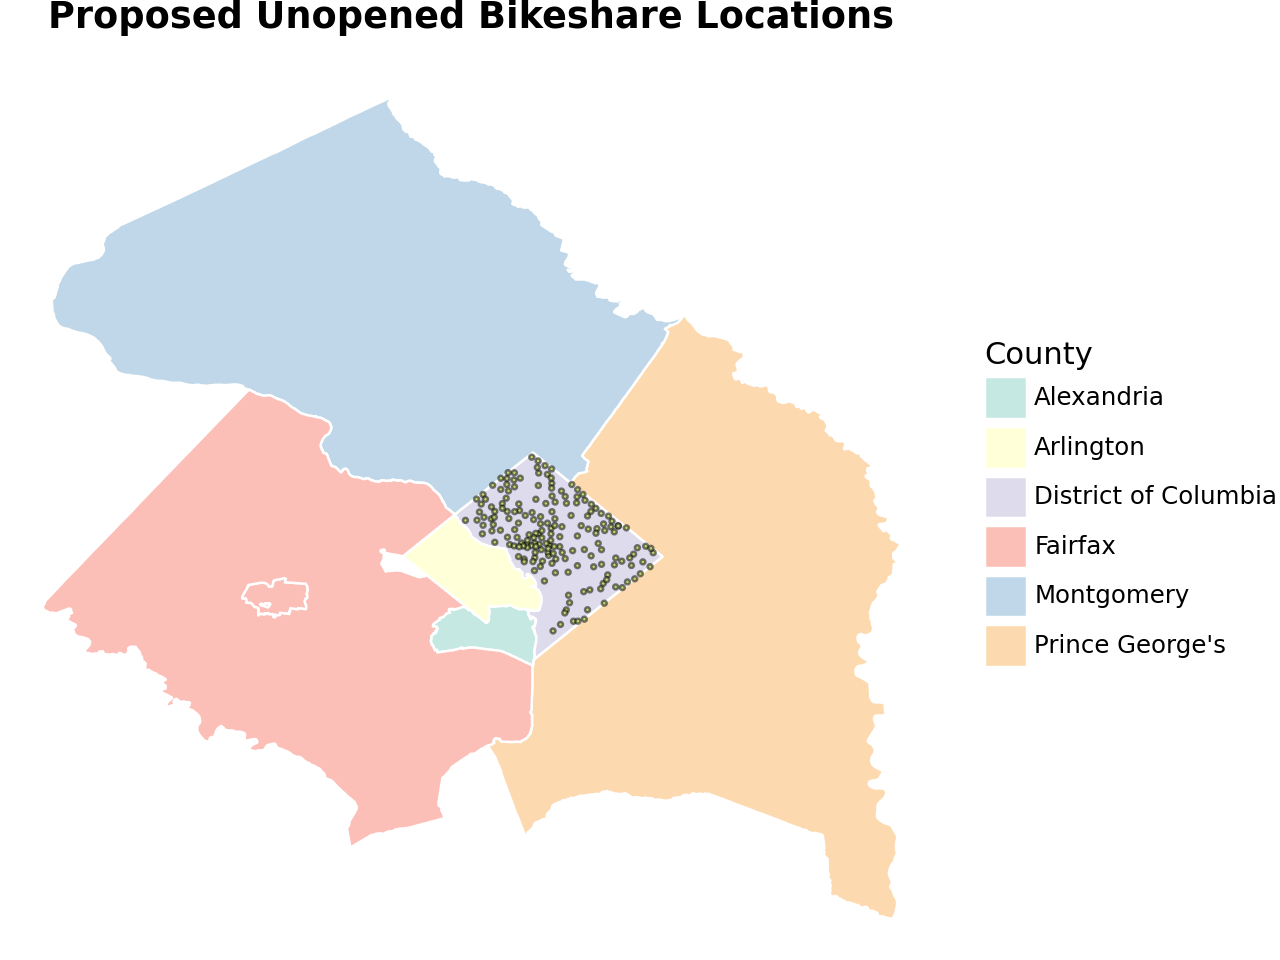

In [26]:
#plot of proposed, unopened bikeshares 
(
ggplot(data = proposed) +
    geom_map(data = dmv,
            mapping = aes(fill = 'NAME', geometry = 'geometry'),
            color = "white",
            alpha = 0.5) +
    geom_point(mapping = aes(x = 'long', y = 'lat'),
               color = "black",
               fill = "#c3d67aff",
               size = 0.5,
               alpha = 0.5
        ) +
    labs(title = "Proposed Unopened Bikeshare Locations", fill = "County") +
    theme_void() +
    theme(
      plot_title=element_text(face="bold")
    )+
    scale_fill_brewer(type="qual", palette="Set3")
)

In [20]:
#cleans up .0 after year
df['open_year'] = df['open_year'].replace([np.nan, np.inf, -np.inf], 2000).astype(int).replace(2000, None)

In [21]:
#number of stations opened per year
stations = df['open_year'].value_counts().reset_index().sort_values(by="open_year", ascending=True)

In [22]:
#gets total opened stations per year
stations['sum'] = stations['count'].cumsum()

In [23]:
#compute number of stations with unknown opening years
df['open_year'].isnull().sum()

294

In [24]:
stations

,open_year,count,sum
2,2010,78,78
10,2011,31,109
9,2012,33,142
3,2013,78,220
11,2014,24,244
12,2015,9,253
4,2016,59,312
8,2017,41,353
13,2018,2,355
6,2019,46,401


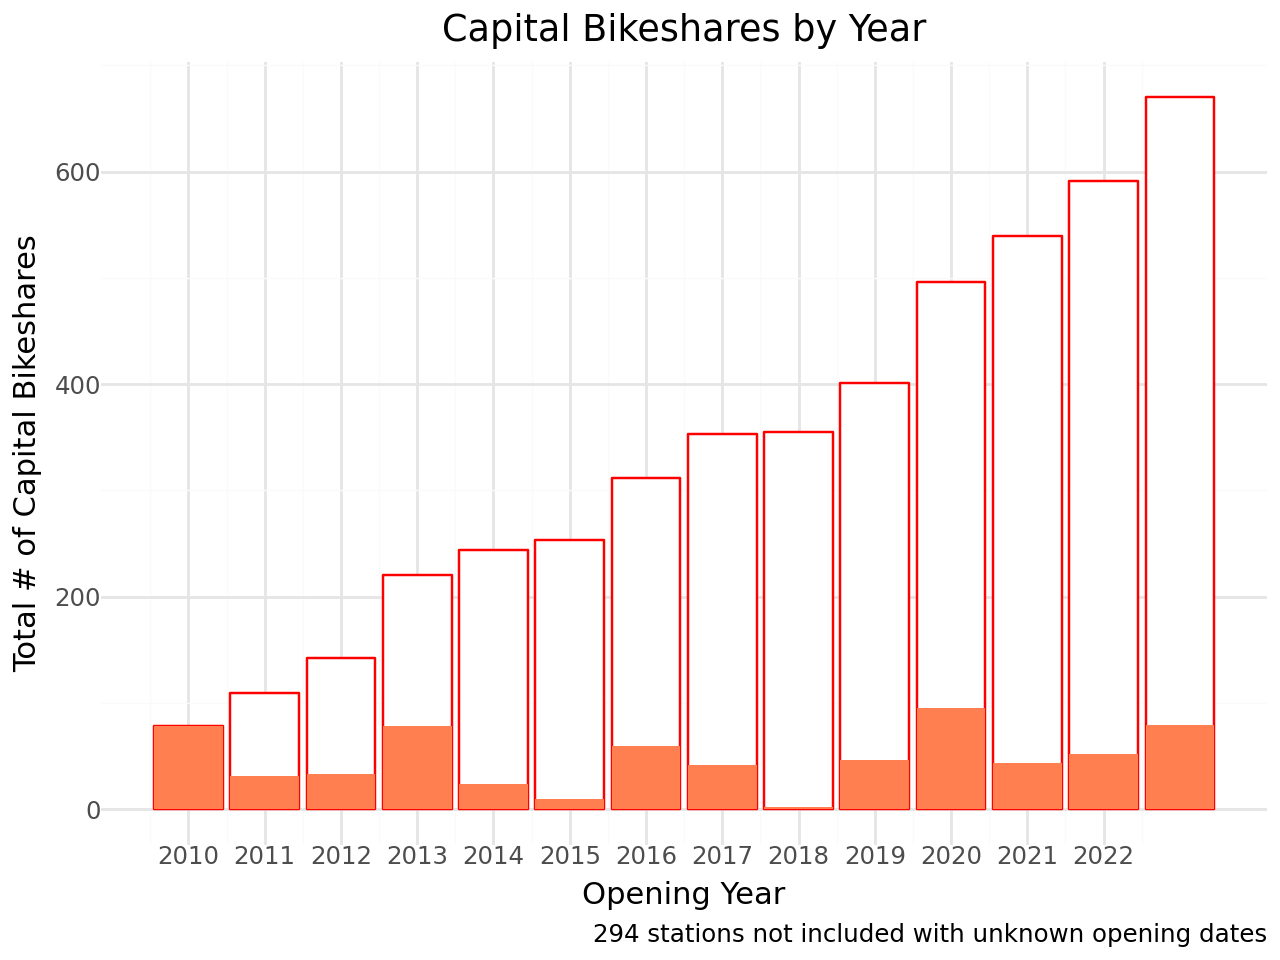

In [25]:
#graph of bikeshares by year
(
ggplot(data = stations) +
    geom_col(aes(x = "open_year", y = "sum"), color = "red", fill = "white") +
    geom_col(aes(x = "open_year", y = "count"), fill = "coral") +
    labs(x = "Opening Year",
        y = "Total # of Capital Bikeshares",
        title = "Capital Bikeshares by Year",
        caption = "294 stations not included with unknown opening dates",) +
    theme_minimal() +
    scale_x_continuous(breaks = range(2010, 2023))
    
)

In [26]:
#melting from wide to long
traffic = df.filter(["open_year", "2010", "2011", "2012", "2013", "2014", "2015", "2016"]).melt(id_vars= ["open_year"], value_vars =["2010", "2011", "2012", "2013", "2014", "2015", "2016"])

In [27]:
#aggregated traffic vol by year
traffic = traffic.groupby("variable")["value"].agg("mean").reset_index()

In [28]:
traffic["variable"]

0    2010
1    2011
2    2012
3    2013
4    2014
5    2015
6    2016
Name: variable, dtype: object

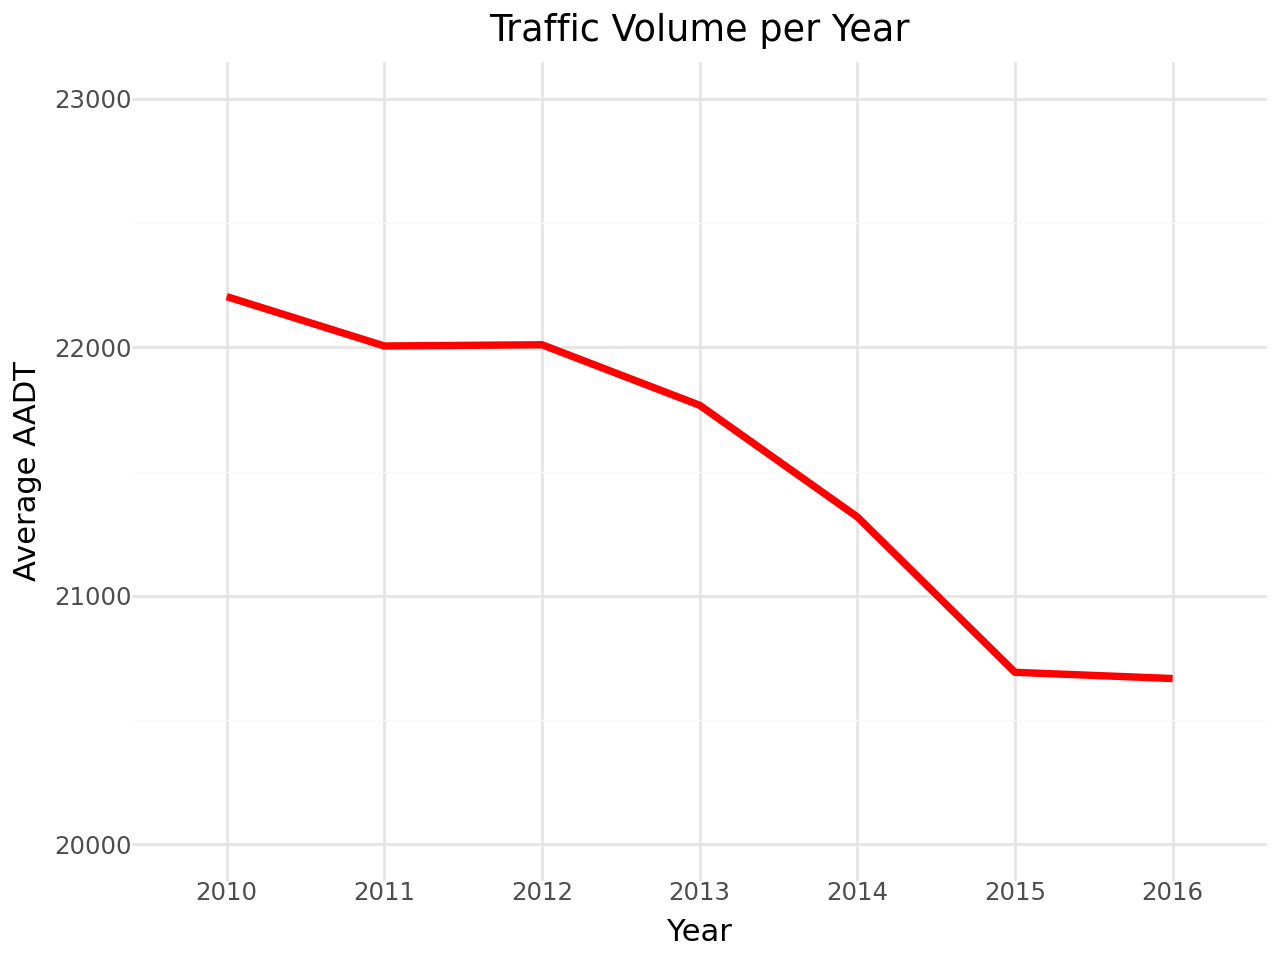

In [32]:
(
ggplot(data = traffic) +
    geom_line(aes(x = "variable", y = "value", group = 1), color = "red", size = 1.5) +
    scale_y_continuous(limits = [20000, 23000]) +
    labs(x = "Year",  y = "Average AADT", title = "Traffic Volume per Year") +
    theme_minimal() 
    
)